<a href="https://colab.research.google.com/github/LeeEunjeong1/Python/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%88%98%EC%A7%91%EA%B3%BC_%EC%A0%84%EC%B2%98%EB%A6%AC_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 수집과 전처리 02 - 구현

<img width="60%" src="https://i.imgur.com/nJdtMzO.jpg" >

#### 2018-2020 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)

# 데이터 준비

In [ ]:
import numpy as np

data = [
    [20.1, 32.4, 42.4, 86.3],
    [20.2, 35.2, np.nan, np.nan], 
    [22.1, 30.1, 45.2, np.nan],
    [23.5, np.nan, 42.1, 85.1],
    [21.3, 32.1, 46.2, 81.3],
]

In [ ]:
import pandas as pd
import io

df = pd.DataFrame(data, columns=list('ABCD'))
df

,A,B,C,D
0,20.1,32.4,42.4,86.3
1,20.2,35.2,NaN,NaN
2,22.1,30.1,45.2,NaN
3,23.5,NaN,42.1,85.1
4,21.3,32.1,46.2,81.3


# 데이터 개괄 확인

In [ ]:
df.head(2) # 앞부분

,A,B,C,D
0,20.1,32.4,42.4,86.3
1,20.2,35.2,NaN,NaN


In [ ]:
df.tail(2) # 앞부분

,A,B,C,D
3,23.5,NaN,42.1,85.1
4,21.3,32.1,46.2,81.3


In [ ]:
df.info() # 기본 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
A    5 non-null float64
B    4 non-null float64
C    4 non-null float64
D    3 non-null float64
dtypes: float64(4)
memory usage: 288.0 bytes


In [ ]:
df.describe() # 기본 통계량

,A,B,C,D
count,5.000000,4.000000,4.00000,3.000000
mean,21.440000,32.450000,43.97500,84.233333
std,1.417039,2.098412,2.03695,2.610236
min,20.100000,30.100000,42.10000,81.300000
25%,20.200000,31.600000,42.32500,83.200000
50%,21.300000,32.250000,43.80000,85.100000
75%,22.100000,33.100000,45.45000,85.700000
max,23.500000,35.200000,46.20000,86.300000


# 결측치 처리: 개수 확인

In [ ]:
# 결측치 개수

df.isnull().sum()

A    0
B    1
C    1
D    2
dtype: int64

In [ ]:
# 결측치 개수 (전체)

df.isnull().sum().sum()

4

In [ ]:
df.dropna() # df.dropna(axis=0)

,A,B,C,D
0,20.1,32.4,42.4,86.3
4,21.3,32.1,46.2,81.3


# 결측치 처리: dropna()

간편하지만, 관측점 (혹은 변수)가 줄어 

In [ ]:
df.dropna(axis=1)

,A
0,20.1
1,20.2
2,22.1
3,23.5
4,21.3


In [ ]:
df.dropna(axis=1, how='all') # 컬럼의 모든 값이 NaN 경우만

,A,B,C,D
0,20.1,32.4,42.4,86.3
1,20.2,35.2,NaN,NaN
2,22.1,30.1,45.2,NaN
3,23.5,NaN,42.1,85.1
4,21.3,32.1,46.2,81.3


# 결측치 처리: 대체 (imputation)

In [ ]:
df.median()

A    21.30
B    32.25
C    43.80
D    85.10
dtype: float64

In [ ]:
# 결측치를 median으로 대체
df.fillna(df.median())

,A,B,C,D
0,20.1,32.40,42.4,86.3
1,20.2,35.20,43.8,85.1
2,22.1,30.10,45.2,85.1
3,23.5,32.25,42.1,85.1
4,21.3,32.10,46.2,81.3


# 결측치 처리: Scikit-learn Imputation

https://scikit-learn.org/stable/modules/impute.html#impute

In [ ]:
# Scikit-learn Imputation

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
imp.fit_transform(df)

array([[20.1, 32.4, 42.4, 86.3],
       [20.2, 35.2, 42.1, 81.3],
       [22.1, 30.1, 45.2, 81.3],
       [23.5, 30.1, 42.1, 85.1],
       [21.3, 32.1, 46.2, 81.3]])

# Outlier 처리

* 1) 표준편차 3 이상 
* 2) IQR
* 3) 도메인 지식

In [ ]:
df = pd.DataFrame({'data': np.random.normal(size=500)})
df.head()

,data
0,1.185227
1,1.057760
2,-1.442863
3,1.008907
4,-0.516544


# Outlier 처리: $3\sigma$ 이상 값

<img src="https://i.imgur.com/3stiKaz.png" >
https://en.wikipedia.org/wiki/Interquartile_range

In [ ]:
# Outlier 조건
outlier_conds = np.abs(df['data'] - df['data'].mean()) > (3*df['data'].std())
print('row count', len(df[outlier_conds]))

row count 3


In [ ]:
df[outlier_conds] # Outlier 확인

,data
258,-2.966951
267,3.019987
484,-3.102141


In [ ]:
# Outlier 위치에 NaN을 채움
df[outlier_conds] = np.nan
df[df['data'].isnull()]

,data
258,NaN
267,NaN
484,NaN


# Outlier 처리: IQR 이용하는 방법

In [ ]:
df['data'].quantile([0.25, 0.75])

0.25   -0.680335
0.75    0.618382
Name: data, dtype: float64

In [ ]:
q1, q3 = df['data'].quantile([0.25, 0.75])
IQR = q3 - q1
lower_bound = q1 - (IQR * 1.5)
upper_bound = q3 + (IQR * 1.5)

out_conds = (df['data'] < lower_bound) | (upper_bound < df['data'])
df[out_conds]

,data
67,2.599193
77,2.576309
393,2.685943


# 잡음값 (Noisy Value)
* 비닝(Binning)
* 회귀(Regression)
* 이상점 분석(Outlier Analysis)
* 데이터 평활화

# 잡음값 처리: 비닝
* 연속형 변수를 범주형 변수로
* 몇 개의 BIN(혹은 버킷)으로 분할

In [ ]:
data = np.random.randint(1, 10, 7)
data

array([2, 2, 3, 6, 6, 8, 8])

In [ ]:
pd.cut(data, 3)

[(1.994, 4.0], (1.994, 4.0], (1.994, 4.0], (4.0, 6.0], (4.0, 6.0], (6.0, 8.0], (6.0, 8.0]]
Categories (3, interval[float64]): [(1.994, 4.0] < (4.0, 6.0] < (6.0, 8.0]]

In [ ]:
pd.cut(data, 3, labels=['별로', '보통', '좋음'])

[별로, 별로, 별로, 보통, 보통, 좋음, 좋음]
Categories (3, object): [별로 < 보통 < 좋음]

# 데이터 통합 (Data Itegration) 
다양한 소스에서 얻은  데이터를 정리
* 데이터 변환 (Data Transformation) - Normalization, Aggregation, Generalization
* 데이터 정리 (Data Reduction) - 중복제거, 효율적 재배치

# 데이터 변환 (Data Transformation)
* Normalization - 동일한 범위로 변환 (예: 0~1사이 비율로 변환) 
* Aggregation - 2개이상의 feature를 하나로 조합 (예: 2개의 범주를 조합하여 새로운 그룹을 생성)
* Generalization - 저수준의 속성을 고수준의 표준으로 변환

# 데이터 변환: 스케일링
데이터에 선형 변환을 적용 자료의 분포를 균일하게 만드는 과정

* scale(X): 기본 스케일, 평균이 0, 분산을 1으로 선형변환
* robust_scale(X): 중앙값(median)0, IQR=1이 되도록 변환 (아웃라이어의 영향 최소화)
* minmax_scale(X): 최대값과 최소값이 각각 1, 0이 되도록 스케일링
* maxabs_scale(X): 최대절대값과 0이 각각 1, 0이 되도록 스케일링

In [ ]:
import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

df = pd.DataFrame({'x':np.arange(-3, 9, dtype=float) })
df.iloc[-1] = 50 # outlier
df

,x
0,-3.0
1,-2.0
2,-1.0
3,0.0
4,1.0
5,2.0
6,3.0
7,4.0
8,5.0
9,6.0


In [ ]:
df['scale(x)'] = scale(df[['x']])
df['robust_scale(x)'] = robust_scale(df[['x']])
df['minmax_scale(x)'] = minmax_scale(df[['x']])
df['maxabs_scale(x)'] = maxabs_scale(df[['x']])
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.661395,-1.000000,0.000000,-0.06
1,-2.0,-0.587907,-0.818182,0.018868,-0.04
2,-1.0,-0.514419,-0.636364,0.037736,-0.02
3,0.0,-0.440930,-0.454545,0.056604,0.00
4,1.0,-0.367442,-0.272727,0.075472,0.02
5,2.0,-0.293953,-0.090909,0.094340,0.04
6,3.0,-0.220465,0.090909,0.113208,0.06
7,4.0,-0.146977,0.272727,0.132075,0.08
8,5.0,-0.073488,0.454545,0.150943,0.10
9,6.0,0.000000,0.636364,0.169811,0.12


In [ ]:
df.describe()

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
count,12.00000,1.200000e+01,12.000000,12.000000,12.000000
mean,6.00000,3.700743e-17,0.636364,0.169811,0.120000
std,14.21267,1.044466e+00,2.584122,0.268164,0.284253
min,-3.00000,-6.613953e-01,-1.000000,0.000000,-0.060000
25%,-0.25000,-4.593023e-01,-0.500000,0.051887,-0.005000
50%,2.50000,-2.572093e-01,0.000000,0.103774,0.050000
75%,5.25000,-5.511628e-02,0.500000,0.155660,0.105000
max,50.00000,3.233488e+00,8.636364,1.000000,1.000000


# 정규화 (Normalization)
데이터의 크기(norm)를 모두 같게 만드는 변환 (개별 데이터에 대해 서로 다른 변환 계수를 적용)
상대적 크기만 중요한 경우에 사용

In [ ]:
import numpy as np
from sklearn.preprocessing import scale, normalize

x= np.array(
   [[-20., -2.],
    [-19., -1.],
    [-18.,  0.],
    [-17.,  1.],
    [-16.,  2.]]
)

y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("normlize:\n", y2)

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]


In [ ]:
!pip install mglearn

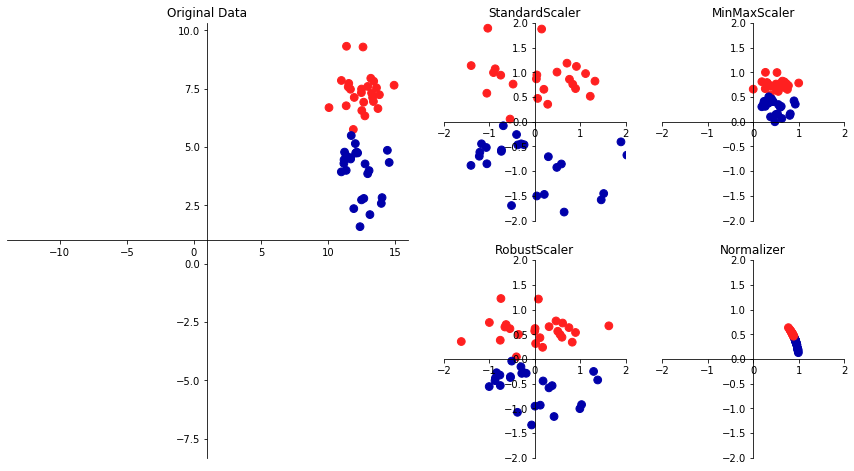

In [ ]:
import mglearn
mglearn.plots.plot_scaling()

In [ ]:
np.linalg.norm(y2, ord=2, axis=1)

array([1., 1., 1., 1., 1.])

# 참고
* http://colingorrie.github.io/outlier-detection.html Three ways to detect outliers

#### 2018-2020 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)